<a href="https://colab.research.google.com/github/ranjani5/fraud-detection/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_selection import SelectKBest,f_classif,mutual_info_classif

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from zipfile import ZipFile
data = '/content/gdrive/MyDrive/credit.zip'

with ZipFile(data, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [4]:
data =pd.read_csv('/content/creditcard.csv')

In [8]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.describe().round(decimals=2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,1.09,1.02,1.00,1.00,0.96,0.92,0.88,0.85,0.84,0.81,0.77,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,-24.59,-4.80,-18.68,-5.79,-19.21,-4.50,-14.13,-25.16,-9.50,-7.21,-54.50,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,-0.54,-0.76,-0.41,-0.65,-0.43,-0.58,-0.47,-0.48,-0.50,-0.46,-0.21,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,-0.09,-0.03,0.14,-0.01,0.05,0.05,0.07,-0.07,-0.00,0.00,-0.06,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,0.45,0.74,0.62,0.66,0.49,0.65,0.52,0.40,0.50,0.46,0.13,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,23.75,12.02,7.85,7.13,10.53,8.88,17.32,9.25,5.04,5.59,39.42,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


### **columns names**

In [7]:
print('columns :' , list(data))
print('Number of columns : ', len(list(data)))

columns : ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
Number of columns :  31


**In this dataset each row is labelled ad fraud or genuine**

1. 1 indicates fraud

2. 0 indicates genuine

In [10]:
n_genuine = len(data[data['Class'] == 0])
n_fraud = len(data[data['Class'] == 1])

 **ploting no of genuine and fraud transcations as a pie chart to get vizual representation of the proportions of fraud and genuine**

Number of genuine transactions :  284315
Number of fraud transactions :  492


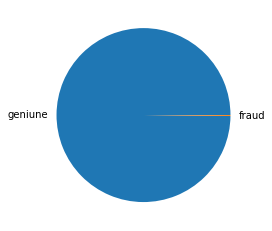

In [11]:
print('Number of genuine transactions : ', n_genuine)
print('Number of fraud transactions : ', n_fraud)
plt.pie([n_genuine,n_fraud], labels=['geniune', 'fraud'], radius=1)
plt.show()

As shown in above chart the data  is highly imbalanced

### Data preprocessing

 **This ddataset doesnot provide a description for the features in this dataset .so there is no way to select the revalent features manually**

 **Therefore we select some of the best features and discard irrevalent features**

 **we r using selectkbest frm sklearn library**

### **seperate features and labels with a slicing operation**

here x denotes the column and y denotes label column

In [12]:
X, y = data.iloc[:, :-1],data.iloc[:,-1]
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [13]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

### **USing f_classif score to  select tke kbest features. k specified as a parameters to the selectkbest constructor**

 **The f_classif procedure performs the f test and coputes a score for each of the features.Then selects the k feature with the k highest scores.**

 **fit():it computes the scores and selects the k best feature**


In [14]:
k =10
k_best = SelectKBest(f_classif,k=k)
k_best.fit(X,y)

SelectKBest(k=10, score_func=<function f_classif at 0x7fc7a5d91268>)

### **Discarding all bad features**

**using the function get_support() get the 
list of booleans that represents whether the ith feature is among the k-best or not.**

 **Then using the fuction drop to discard the bad features frm the dataframe **

 **>Numpy allows indexing an array with a boolean array select the best feature by indexing with mask.**

 **> Then select the bad feature by indexing with the logical not of mask**















In [17]:
mask = k_best.get_support()
not_mask = np.logical_not(mask)

all_features = np.array(list(X))

best_features = all_features[mask]
bad_features = all_features[not_mask]

print('Best Features : ', best_features)
print('Bad Features : ', bad_features)


Best Features :  ['V3' 'V4' 'V7' 'V10' 'V11' 'V12' 'V14' 'V16' 'V17' 'V18']
Bad Features :  ['Time' 'V1' 'V2' 'V5' 'V6' 'V8' 'V9' 'V13' 'V15' 'V19' 'V20' 'V21' 'V22'
 'V23' 'V24' 'V25' 'V26' 'V27' 'V28' 'Amount']


In [18]:
X = X.drop(bad_features, axis=1)
X.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18
0,2.536347,1.378155,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791
1,0.166480,0.448154,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361
2,1.773209,0.379780,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359
3,1.792993,-0.863291,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775
4,1.548718,0.403034,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195


## **plotting distribution plots of best features and bad features to observe the distribution of the data**

if the distribution plots of gnuine and fraud data line on top of each other , it means, usiing the column we wont be able to distinguish b/w genuine and fraud transcations.

but if plts have different shapes, i.e using this plot we will be able to distinguish fraud and genuine transcations

In [22]:
def plot_fraud_genuine(features, data):
  plt_index = 0
  plt.figure(figsize=(10, 10))
  plt. subplots_adjust(top = 0.99, bottom =0.01, hspace=1.5, wspace=0.4)
  for feature in features:
    plt_index += 1
    feature_data = pd.concat([data[feature], data['Class']], axis=1)
    fraud = feature_data[data['Class'] == 1]
    genuine = feature_data[data['Class'] == 0]
    if len(genuine > 10000):
      genuine = genuine[::100]
    plt.subplot(5, 5, plt_index)
    sns.distplot(fraud[feature])
    sns.distplot(genuine[feature])
    plt.title(feature)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

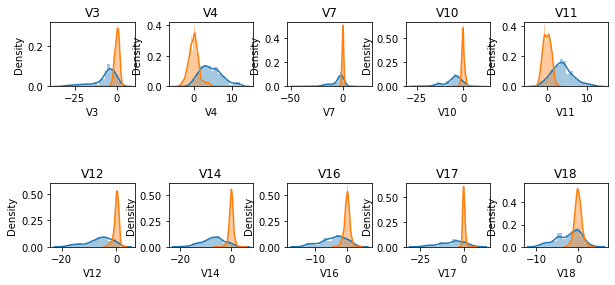

In [23]:
plot_fraud_genuine(best_features,data)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

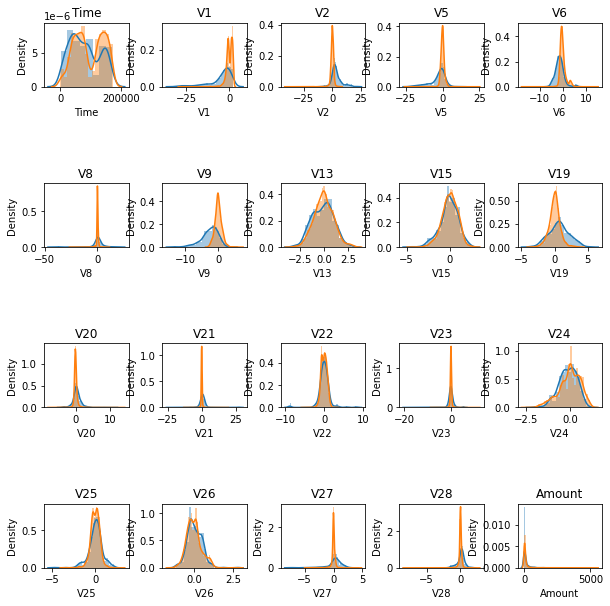

In [24]:
plot_fraud_genuine(bad_features,data)

# **Train model**

### split the dataset--80:20-train test split

In [25]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

### **cross-validation on training dataset**

Bcz the data is highly imbalanced we use cross validation .

split the dataset into training and testing dataset

   Train the model using cv on training dataset

   test the model with testing data





 **CV: it divides the data into  kequal parts then each chunk is considered as testing data and rest of the chuncks is considered as training data**

 **in our model we are using cv bcz we have small no of fraud transcations, so in order to make madel more general we use cv to train the model**

In [27]:
 nb = GaussianNB()
 cv_results = cross_validate(nb,x_train,y_train,cv=10,
                               scoring='recall',
                               return_train_score=True,
                               return_estimator=True)
 

In [29]:
print('Training scores from each fold :',cv_results['train_score'])
max_score_index = np.argmax(cv_results['train_score'])
best_estimator = cv_results['estimator'][max_score_index]

Training scores from each fold : [0.86647727 0.86363636 0.86647727 0.86647727 0.86039886 0.85795455
 0.86079545 0.86363636 0.87215909 0.85795455]
